In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic' 
matplotlib.rcParams['font.size'] = 15 
matplotlib.rcParams['axes.unicode_minus'] = False
from tensorflow import keras
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, RandomizedSearchCV
from xgboost import XGBClassifier 
from xgboost import plot_importance 
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from scipy.stats import loguniform, uniform, randint

In [48]:
df=pd.read_csv('./train.csv',index_col='id')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18524 entries, 0 to 18523
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           17334 non-null  float64
 1   Stage_fear                 16631 non-null  object 
 2   Social_event_attendance    17344 non-null  float64
 3   Going_outside              17058 non-null  float64
 4   Drained_after_socializing  17375 non-null  object 
 5   Friends_circle_size        17470 non-null  float64
 6   Post_frequency             17260 non-null  float64
 7   Personality                18524 non-null  object 
dtypes: float64(5), object(3)
memory usage: 1.3+ MB


In [49]:
df['Time_spent_Alone']=11-df['Time_spent_Alone']

In [50]:
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
id,,,,,,,,
0,11.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,10.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,5.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert
3,8.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,10.0,No,4.0,4.0,No,13.0,NaN,Extrovert


In [51]:
df.rename(columns={'Time_spent_Alone':'Time_spent_together'},inplace=True)

In [52]:
df.head()

,Time_spent_together,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
id,,,,,,,,
0,11.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,10.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,5.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert
3,8.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,10.0,No,4.0,4.0,No,13.0,NaN,Extrovert


In [12]:
df['Time_spent_together'].isnull().sum()

1190

In [13]:
df.max(numeric_only=True,axis=0)

Time_spent_together        11.0
Social_event_attendance    10.0
Going_outside               7.0
Friends_circle_size        15.0
Post_frequency             10.0
dtype: float64

In [53]:
col=['Time_spent_together', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency']
mm=MinMaxScaler()
df[col]=mm.fit_transform(df[col])
df.head()

,Time_spent_together,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
id,,,,,,,,
0,1.000000,No,0.6,0.571429,No,1.000000,0.5,Extrovert
1,0.909091,No,0.7,0.428571,No,0.666667,0.8,Extrovert
2,0.454545,Yes,0.1,0.000000,NaN,0.200000,0.0,Introvert
3,0.727273,No,0.7,0.428571,No,0.733333,0.5,Extrovert
4,0.909091,No,0.4,0.571429,No,0.866667,NaN,Extrovert


In [54]:
cols = ['Time_spent_together', 'Social_event_attendance', 'Going_outside', 
        'Friends_circle_size', 'Post_frequency']

# 평균 계산 (np.nan 무시하고 row-wise 계산)
df['Social_avg'] = df[cols].sum(axis=1, skipna=True) / df[cols].notna().sum(axis=1)

In [9]:
df.head()

,Time_spent_together,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality,Social_avg
id,,,,,,,,,
0,1.000000,No,0.6,0.571429,No,1.000000,0.5,Extrovert,0.734286
1,0.909091,No,0.7,0.428571,No,0.666667,0.8,Extrovert,0.700866
2,0.454545,Yes,0.1,0.000000,NaN,0.200000,0.0,Introvert,0.150909
3,0.727273,No,0.7,0.428571,No,0.733333,0.5,Extrovert,0.617835
4,0.909091,No,0.4,0.571429,No,0.866667,NaN,Extrovert,0.686797


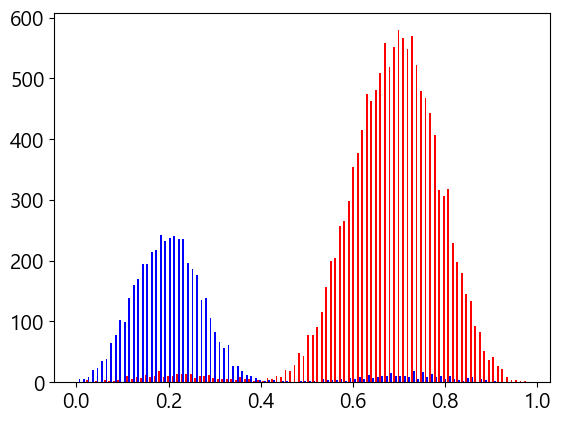

In [24]:
a=[i for i in df.loc[df['Personality']=='Extrovert','Social_avg']]
b=[i for i in df.loc[df['Personality']=='Introvert','Social_avg']]
plt.hist((a,b),bins=100,color=['red','blue'])
#plt.hist(b,bins=100,color='blue')
plt.show()

In [25]:
df['Social_avg'].isnull().sum()

0

In [32]:
df.loc[(df['Social_avg']>0.4)&(df['Personality']=='Introvert')]

,Time_spent_together,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality,Social_avg
id,,,,,,,,,
124,0.636364,No,0.7,0.857143,No,0.733333,0.3,Introvert,0.645368
149,1.000000,No,0.4,0.857143,No,NaN,0.3,Introvert,0.639286
272,0.636364,No,0.5,0.428571,No,0.800000,0.3,Introvert,0.532987
285,NaN,No,0.9,0.714286,No,0.800000,0.6,Introvert,0.753571
338,NaN,No,0.9,0.857143,No,0.866667,0.8,Introvert,0.855952
...,...,...,...,...,...,...,...,...,...
18276,1.000000,No,0.9,0.714286,No,0.666667,0.9,Introvert,0.836190
18312,1.000000,No,0.5,0.857143,No,1.000000,0.9,Introvert,0.851429
18321,0.545455,Yes,0.3,0.428571,Yes,0.200000,0.6,Introvert,0.414805


In [33]:
df.loc[(df['Social_avg']<0.4)&(df['Personality']=='Extrovert')]

,Time_spent_together,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality,Social_avg
id,,,,,,,,,
63,0.272727,Yes,0.4,0.285714,Yes,NaN,0.0,Extrovert,0.239610
102,0.454545,Yes,0.2,0.000000,Yes,0.133333,0.0,Extrovert,0.157576
139,0.000000,NaN,0.2,0.285714,Yes,0.133333,0.2,Extrovert,0.163810
398,0.636364,Yes,0.2,0.285714,Yes,0.466667,0.2,Extrovert,0.357749
403,0.454545,NaN,0.1,NaN,Yes,0.200000,0.2,Extrovert,0.238636
...,...,...,...,...,...,...,...,...,...
18282,0.181818,Yes,0.2,0.000000,Yes,0.533333,0.0,Extrovert,0.183030
18317,0.000000,NaN,0.0,0.000000,Yes,0.133333,0.0,Extrovert,0.026667
18337,0.545455,Yes,0.3,NaN,NaN,0.266667,0.2,Extrovert,0.328030


In [36]:
1-(320+275)/18524

0.9678795076657309

In [55]:
df['missing_count'] = df.isna().sum(axis=1)

In [56]:
df.head()

,Time_spent_together,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality,Social_avg,missing_count
id,,,,,,,,,,
0,1.000000,No,0.6,0.571429,No,1.000000,0.5,Extrovert,0.734286,0
1,0.909091,No,0.7,0.428571,No,0.666667,0.8,Extrovert,0.700866,0
2,0.454545,Yes,0.1,0.000000,NaN,0.200000,0.0,Introvert,0.150909,1
3,0.727273,No,0.7,0.428571,No,0.733333,0.5,Extrovert,0.617835,0
4,0.909091,No,0.4,0.571429,No,0.866667,NaN,Extrovert,0.686797,1


In [57]:
cols = [col for col in df.columns if col != 'Personality'] + ['Personality']
df = df[cols]
df.head()

,Time_spent_together,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Social_avg,missing_count,Personality
id,,,,,,,,,,
0,1.000000,No,0.6,0.571429,No,1.000000,0.5,0.734286,0,Extrovert
1,0.909091,No,0.7,0.428571,No,0.666667,0.8,0.700866,0,Extrovert
2,0.454545,Yes,0.1,0.000000,NaN,0.200000,0.0,0.150909,1,Introvert
3,0.727273,No,0.7,0.428571,No,0.733333,0.5,0.617835,0,Extrovert
4,0.909091,No,0.4,0.571429,No,0.866667,NaN,0.686797,1,Extrovert


In [58]:
def ohe(x):
    return 1 if x=='Yes' else (0 if x=='No' else np.nan)
le=LabelEncoder()
xy=df
xy[['Stage_fear','Drained_after_socializing']]=df[['Stage_fear','Drained_after_socializing']].applymap(ohe)
xy['Personality']=le.fit_transform(xy['Personality'])  # extrovert=0, introvert=1
xy.head()

C:\Users\itwill\AppData\Local\Temp\ipykernel_9904\2027614981.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  xy[['Stage_fear','Drained_after_socializing']]=df[['Stage_fear','Drained_after_socializing']].applymap(ohe)


,Time_spent_together,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Social_avg,missing_count,Personality
id,,,,,,,,,,
0,1.000000,0.0,0.6,0.571429,0.0,1.000000,0.5,0.734286,0,0
1,0.909091,0.0,0.7,0.428571,0.0,0.666667,0.8,0.700866,0,0
2,0.454545,1.0,0.1,0.000000,NaN,0.200000,0.0,0.150909,1,1
3,0.727273,0.0,0.7,0.428571,0.0,0.733333,0.5,0.617835,0,0
4,0.909091,0.0,0.4,0.571429,0.0,0.866667,NaN,0.686797,1,0


In [59]:
class_weights = {
    0: 18524 / (2 * 13699),  # ≈ 0.676
    1: 18524 / (2 * 4825)    # ≈ 1.92
}
x=xy.iloc[:,:-1]; y=xy.iloc[:,-1]
x_train,x_test,y_train, y_test= train_test_split(x,y,test_size=0.2,random_state=123)

In [60]:
            params = {'colsample_bytree': uniform(0.5,1), #각 트리 생성 시 사용하는 feature 비율
                      'learning_rate': uniform(0.01, 0.3), #값이 낮을수록 학습이 느리지만 일반화 성능 좋음
                      'max_depth' : randint(5,15),
                      'min_child_weight' : randint(1, 5), #자식 노드 분할을 결정하는 최소 가중치의 합 -> 작으면 더 만흥 자식 노드 분할
                      'n_estimators' : [100, 200, 300,500]} # 트리개수

In [61]:
xc=XGBClassifier(objective='binary:logistic',eval_metric='logloss')
rs=RandomizedSearchCV(xc,param_distributions=params,n_iter=100,n_jobs=-1,random_state=123)
from sklearn.utils.class_weight import compute_sample_weight

# 클래스별 가중치 정의 (예: 반비례 방식)
class_weights = {0: 0.676, 1: 1.92}  # 예시

# 샘플별 가중치 생성
sample_weights = compute_sample_weight(class_weight=class_weights, y=y_train)

# RandomizedSearchCV에 넘기려면 fit_params를 통해 전달
rs.fit(x_train, y_train, **{'sample_weight': sample_weights})
rs.best_params_, np.max(rs.cv_results_['mean_test_score'])

C:\Users\itwill\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
270 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\itwill\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\itwill\anaconda3\Lib\site-packages\xgboost\core.py", line 729, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\itwill\anaconda3\Lib\site-packages\xgboost\sklearn.py", line 1682, in fit
    self._Booster = train(
                    ^^^^^^
  File "C:\Users\it

({'colsample_bytree': 0.7450330385556763,
  'learning_rate': 0.04521953115744677,
  'max_depth': 7,
  'min_child_weight': 4,
  'n_estimators': 100},
 nan)

In [62]:
model=rs.best_estimator_

In [63]:
model.score(x_test,y_test)

0.9686909581646423

In [64]:
model.score(x_train,y_train)

0.9703083878804237

In [77]:
test=pd.read_csv('./test.csv',index_col='id')
test.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
id,,,,,,,
18524,3.0,No,7.0,4.0,No,6.0,NaN
18525,NaN,Yes,0.0,0.0,Yes,5.0,1.0
18526,3.0,No,5.0,6.0,No,15.0,9.0
18527,3.0,No,4.0,4.0,No,5.0,6.0
18528,9.0,Yes,1.0,2.0,Yes,1.0,1.0


In [78]:
test['Time_spent_Alone']=11-test['Time_spent_Alone']

In [79]:
col=['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency']
mm=MinMaxScaler()
test[col]=mm.fit_transform(test[col])
test.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
id,,,,,,,
18524,0.727273,No,0.7,0.571429,No,0.400000,NaN
18525,NaN,Yes,0.0,0.000000,Yes,0.333333,0.1
18526,0.727273,No,0.5,0.857143,No,1.000000,0.9
18527,0.727273,No,0.4,0.571429,No,0.333333,0.6
18528,0.181818,Yes,0.1,0.285714,Yes,0.066667,0.1


In [80]:
cols = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 
        'Friends_circle_size', 'Post_frequency']

# 평균 계산 (np.nan 무시하고 row-wise 계산)
test['Social_avg'] = test[cols].sum(axis=1, skipna=True) / test[cols].notna().sum(axis=1)


In [81]:
test.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Social_avg
id,,,,,,,,
18524,0.727273,No,0.7,0.571429,No,0.400000,NaN,0.599675
18525,NaN,Yes,0.0,0.000000,Yes,0.333333,0.1,0.108333
18526,0.727273,No,0.5,0.857143,No,1.000000,0.9,0.796883
18527,0.727273,No,0.4,0.571429,No,0.333333,0.6,0.526407
18528,0.181818,Yes,0.1,0.285714,Yes,0.066667,0.1,0.146840


In [82]:
def ohe(x):
    return 1 if x=='Yes' else (0 if x=='No' else np.nan)
le=LabelEncoder()
xy=test
xy[['Stage_fear','Drained_after_socializing']]=test[['Stage_fear','Drained_after_socializing']].applymap(ohe)
xy.head()

C:\Users\itwill\AppData\Local\Temp\ipykernel_9904\2376298360.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  xy[['Stage_fear','Drained_after_socializing']]=test[['Stage_fear','Drained_after_socializing']].applymap(ohe)


,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Social_avg
id,,,,,,,,
18524,0.727273,0.0,0.7,0.571429,0.0,0.400000,NaN,0.599675
18525,NaN,1.0,0.0,0.000000,1.0,0.333333,0.1,0.108333
18526,0.727273,0.0,0.5,0.857143,0.0,1.000000,0.9,0.796883
18527,0.727273,0.0,0.4,0.571429,0.0,0.333333,0.6,0.526407
18528,0.181818,1.0,0.1,0.285714,1.0,0.066667,0.1,0.146840


In [83]:
xy.rename(columns={'Time_spent_Alone':'Time_spent_together'},inplace=True)

In [84]:
xy.head()

,Time_spent_together,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Social_avg
id,,,,,,,,
18524,0.727273,0.0,0.7,0.571429,0.0,0.400000,NaN,0.599675
18525,NaN,1.0,0.0,0.000000,1.0,0.333333,0.1,0.108333
18526,0.727273,0.0,0.5,0.857143,0.0,1.000000,0.9,0.796883
18527,0.727273,0.0,0.4,0.571429,0.0,0.333333,0.6,0.526407
18528,0.181818,1.0,0.1,0.285714,1.0,0.066667,0.1,0.146840


In [85]:
xy['missing_count'] = xy.isna().sum(axis=1)

In [86]:
xy.head()

,Time_spent_together,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Social_avg,missing_count
id,,,,,,,,,
18524,0.727273,0.0,0.7,0.571429,0.0,0.400000,NaN,0.599675,1
18525,NaN,1.0,0.0,0.000000,1.0,0.333333,0.1,0.108333,1
18526,0.727273,0.0,0.5,0.857143,0.0,1.000000,0.9,0.796883,0
18527,0.727273,0.0,0.4,0.571429,0.0,0.333333,0.6,0.526407,0
18528,0.181818,1.0,0.1,0.285714,1.0,0.066667,0.1,0.146840,0


In [87]:
y_pred=model.predict(xy)

In [88]:
ddf=pd.read_csv('./train.csv',index_col='id')

In [89]:
le=LabelEncoder()
le.fit(ddf['Personality'])

LabelEncoder()

In [90]:
y_pred=le.inverse_transform(y_pred)
y_pred

array(['Extrovert', 'Introvert', 'Extrovert', ..., 'Extrovert',
       'Extrovert', 'Introvert'], dtype=object)

In [91]:
y_pred

array(['Extrovert', 'Introvert', 'Extrovert', ..., 'Extrovert',
       'Extrovert', 'Introvert'], dtype=object)

In [92]:
test_ids=test.index
submission = pd.DataFrame({
    'id': test_ids,           # 보통 test.csv에서 가져온 ID 열
    'Personality': y_pred           # 모델이 예측한 결과
})

submission.to_csv('submission.csv', index=False)